# Welcome to Week 2: Trees \& Nodes

In this week's programming exercise, you will be working on implementing a Tree and Node class in Python. Throughout the exercise, you will be extending the class Tree by completing code stubs in their respective cells. You do not need to copy the code, it is enough to work in the cell under each exercise. Note that there are separate cells provided where you can (and should) test your code. During the exercise, you will (through customMagics) obtain a Python file (.py) which you should run against a set of unittests. Please avoid writing any unnecessary code in cells containing the `%%execwritefile` command. Doing this could alter the file `.py` and make it syntactically incorrect or interfere with the unittests. To prevent this stick to the following rules:'
 - ***Do not remove cells that start with ``%%execwritefile`` and do not remove that line.***
 - If a cell contains a `%%execwritefile` command at the top and a class definition you need to complete the given methods and adding helper methods is allowed, but do **not** add new functions or Python script to the cells (like global variables). ***Note, that a helper method must start with a "_"***.
 - If a cell contains a `%%execwritefile` command at the top and **not** a class definition you must complete the given functions and you are free to add helper functions, new classes, and Python script that contains for example global variables. Note, that the use of global variables is almost always wrong except for a few use cases such as RNG for the numpy random generator methods.
 - If a cell does **not** contain a `%%execwritefile` command you can plot things, print variables, and write test cases. Here, you are free to do whatever you want.
 - If a cell does **not** contain a `%%execwritefile` command it should not contain functional code that is needed to run other functions or classes. The reason is that it is not copied to the `.py`. So, it can not be used during the unittesting.

You do not need to look at the customMagic.py nor do more than glimpse at the test file, your exercise is contained in this workbook unless specified differently in this notebook's instructions. 

This exercise is given as a Jupyter notebook, you might run this in your browser by starting a notebook server or through VScode (PyCharm only allows for read-only mode for jupyter notebooks, unless you have Pycharm-pro which is a paid version or you need a student license). The simplest way to [install jupyter](https://docs.jupyter.org/en/latest/install/notebook-classic.html) notebooks is by installing [Anaconda](https://docs.anaconda.com/free/anaconda/install/), a custom python distribution and packagemanager used for Data Science. If you do not want to install all of Anaconda you can also install jupyter via pip: ``pip3 install jupyter`` (`pip3` or `pip` will work depending on how you installed python3). You can find a tutorial for running the notebook [here](https://jupyter-notebook.readthedocs.io/en/latest/notebook.html). With VScode the IDE should guide you in installing the correct packages. 

***Hint: Jupyter Notebooks saves variables between runs. If you get unexpected results try restarting the kernel, this deletes any saved variables.*** 

Please fill in your student name down below

In [1]:
# FILL IN YOU STUDENT NUMBER
student = 3893995

# Set this to false if you want the default screen width.
WIDE_SCREEN = True

In [2]:
from custommagics import CustomMagics

# Set this to false if you want the default screen width.
WIDE_SCREEN = True

if WIDE_SCREEN:
    import notebook
    from IPython.display import display, HTML

    if int(notebook.__version__.split(".")[0]) >= 7:    
        display(HTML(
            '<style>'
                '.jp-Notebook { padding-left: 1% !important; padding-right: 1% !important; width:100% !important; } '
            '</style>'
        ))
    else:
        display(HTML("<style>.container { width:98% !important; }</style>"))

get_ipython().register_magics(CustomMagics)



In [3]:
%%execwritefile exercise2_{student}_notebook.py 0 

# DO NOT CHANGE THIS CELL.
# THESE ARE THE ONLY IMPORTS YOU ARE ALLOWED TO USE:

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import copy
from tree import hierarchy_pos

RNG = np.random.default_rng()

Writing exercise2_3893995_notebook.py


In [4]:
plt.matplotlib.rcParams['figure.figsize'] = [20, 8]

# 1.0 Tree Node

The following code outlines the stub of a Node class. Study how this class works, ensure you thoroughly study the docstrings to get a clear idea of how the class ought to be implemented. 

Your task is to complete the `__repr__` magic method. This is for easier bug fixing. For example, if you later search a node you can print this node in a way that you understand the print. There is no format that you need to adhere to nor is this mandatory. However, it is rather useful as the alternative would be printing attributes of node objects which takes more time.

In [5]:
%%execwritefile exercise2_{student}_notebook.py 10 -a -s

class Node():
    """
    This class creates node objects which can be used to build any kind of Tree 
    that has at most two children and the nodes contain values.

    Attributes:
        :param self.info: The value of the node.
        :type self.info: int
        :param self.left: The left child of this node, defaults to None.
        :type self.left: Node, optional 
        :param self.left: The right child of this node, defaults to None.
        :type self.left: Node, optional 
    """
    def __init__(self, info, left=None, right=None):
        self.info = info
        self.left = left
        self.right = right

    def __repr__(self):
        """
        This returns a representation of a Node object.

        :return: A string representing the Node object.
        :rtype: str
        """
        # Change this to anything you like, such that you can easily print a Node object.
        return super(Node, self).__repr__()

Appending to exercise2_3893995_notebook.py


## Test your code

In the cell below you can test your code from the cell above (ensure you run the cell beforehand) to validate if `__repr__` works as you intended.
To do this create a `Node` object and print it.

In [6]:
Node(10)

# 2.0 Binary (Search) Tree 

The following code outlines the stub of a Binary (Search) Tree class. Study how these classes work, and ensure you thoroughly study the docstrings to get a clear idea of how the class ought to be implemented. 

Your task is to complete the `search` and `add` class methods of the `BinarySearchTree` and implement the `add` function for the `BinaryTree` class.

For your convenience, we have added a way to visualize the binary (search) tree of a `BinaryTree`-object or `BinarySearchTree`-object via the `show()` method. 

In [14]:
%%execwritefile exercise2_{student}_notebook.py 20 -a -s

class BinaryTree():
    """
    This class creates binary tree objects.
    The tree itself is stored recursively. 
    This means that you can only access the root node directly, 
    while other nodes can be accessed through the root node. 
    (Later in this exercise you will implement several of these methods)

    Attributes:
        :param self.root: The root node of the binary tree, defaults to None.
        :type self.root: Node, optional
    """
    def __init__(self, root=None):
        """
        This initializes a binary tree object.
        Note, that this creates by default an empty tree.
        """
        self.root = root

    def add(self, value):
        """    
        Adds a new node to the binary tree, this should be placed randomly at any empty leaf node.
    
        :param value: The value to be added.
        :type value: int
        """
        if self.root is None:
            self.root = Node(value)
        else:
            current = self.root
            while True:
                if value <= current.info:
                    if current.left is None:
                        current.left = Node(value)
                        break
                    else:
                        current = current.left
                else:
                    if current.right is None:
                        current.right = Node(value)
                        break
                    else:
                        current = current.right

    def show(self, show_compact=False):
        """
        This method shows the tree, where the root node is colored blue, 
        the left nodes are colored green, and the right nodes are colored red.

        :param show_compact: This gives the option to show a compact form of the tree. 
                             This means that if a node has only one child it will be shown below it instead of left or right.
                             This parameter defaults to False
        :type show_compact: boolean, optional
        """
        if self.root is None:
            raise ValueError("This is an empty tree and can not be show.")
            
        # Recursively add all edges and nodes.
        def add_node_edge(G, color_map, parent_graph_node, node):
            # In case of printing a binary tree check if a node exists
            if node.info in G:
                i = 2
                while f"{node.info}_{i}" in G:
                    i += 1
                node_name = f"{node.info}_{i}"
            else:
                node_name = node.info
            G.add_node(node_name)

            # Make root node or edge to parent node
            if parent_graph_node is not None:
                G.add_edge(parent_graph_node, node_name)
            else:
                color_map.append("blue")
            
            if node.left is not None:
                color_map.append("green")
                add_node_edge(G, color_map, node_name, node.left)
            elif node.right is not None and not show_compact:
                G.add_node(f"N{node_name}")
                G.add_edge(node_name, f"N{node_name}")
                
            if node.right is not None:
                color_map.append("red")
                add_node_edge(G, color_map, node_name, node.right)
            elif node.left is not None and not show_compact:
                G.add_node(f"N{node_name}")
                G.add_edge(node_name, f"N{node_name}")
        
        # Make the graph
        G = nx.DiGraph()
        color_map = []
        add_node_edge(G, color_map, None, self.root)
        name_root = self.root.info

        # Generate the node positions
        pos = hierarchy_pos(G, root=self.root.info, leaf_vs_root_factor=1)
        new_pos = {k:v for k,v in pos.items() if str(k)[0] != 'N'}
        k = G.subgraph(new_pos.keys())

        if isinstance(self, BinarySearchTree) or isinstance(self, BinarySearchTreeDouble):
            nx.draw(k, pos=new_pos, node_color=color_map, with_labels=True, node_size=600)
        else:
            nx.draw(k, pos=new_pos, with_labels=True, node_size=600)

        # Set the plot settings
        x, y = zip(*pos.values())
        x_min, x_max = min(x), max(x)
        plt.xlim(1.01*x_min-0.01*x_max, 1.01*x_max-0.01*x_min)
        plt.ylim(min(y)-0.05, max(y)+0.05)
        plt.show()

Replace existing code exercise2_3893995_notebook.py


In [15]:
%%execwritefile exercise2_{student}_notebook.py 40 -a -s

class BinarySearchTree(BinaryTree):
    """
    This class creates binary tree objects.
    The tree itself is stored recursively. 
    This means that you can only access the root node directly, 
    while other nodes can be accessed through the root node. 
    (Later in this exercise you will implement several of these methods)

    Attributes:
        :param self.root: The root node of the binary tree, defaults to None.
        :type self.root: Node, optional
    """
    def search(self, value):
        """
        Returns a Tuple with the following two items:
         - the parent of the node with a certain value
         - the node with a certain value
        Note that having access to the parent will prove useful in
        other functions, such as adding and removing.
    
        If the tree does not contain the value, return
        the parent of the node where it should have been
        placed, and a None value.
    
        :param value: The value that you are searching.
        :param type: int
        :return: Tuple of the nodes as described above.
        :rtype: Node, Node
        """
        parent = None
        current = self.root
        while current is not None:
            if value == current.info:
                return parent, current
            elif value < current.info:
                parent = current
                current = current.left
            else:
                parent = current
                current = current.right
        return parent, None
    
    def add(self, value):
        """    
        Adds a new node to the binary search tree, respecting the condition that
        for each node, all values in the left sub-tree are smaller than its value,
        and all values in the right subtree are greater than its value.
        Only add the node with the value, if it does not exist yet in the tree.
    
        :param value: The value to be added.
        :type value: int
        """
        parent, _ = self.search(value)
        if parent is None:
            self.root = Node(value)
        elif value < parent.info:
            parent.left = Node(value)
        elif value > parent.info:
            parent.right = Node(value)

Replace existing code exercise2_3893995_notebook.py


In [16]:
%%execwritefile exercise2_{student}_notebook.py 60 -a -s

class BinarySearchTreeDouble(BinaryTree):
    """
    This is needed for the expert test part 3.0, which is optional and can be ignored for now.
    However, this cell must be run, otherwise, the show method breaks!!!
    """
    pass

Replace existing code exercise2_3893995_notebook.py


## Test your code

In the cell below you can test your code from the cell above (ensure you run the cell beforehand) to validate if `add` and `search` work as intended.
To do this create a `BinarySearchTree` object, add nodes to the tree using `add`, and then use `show` to verify that your implementation works correctly. 
Additionally, you could add some print statements to check if the search method works correctly and repeat the same process for a `BinaryTree` object.

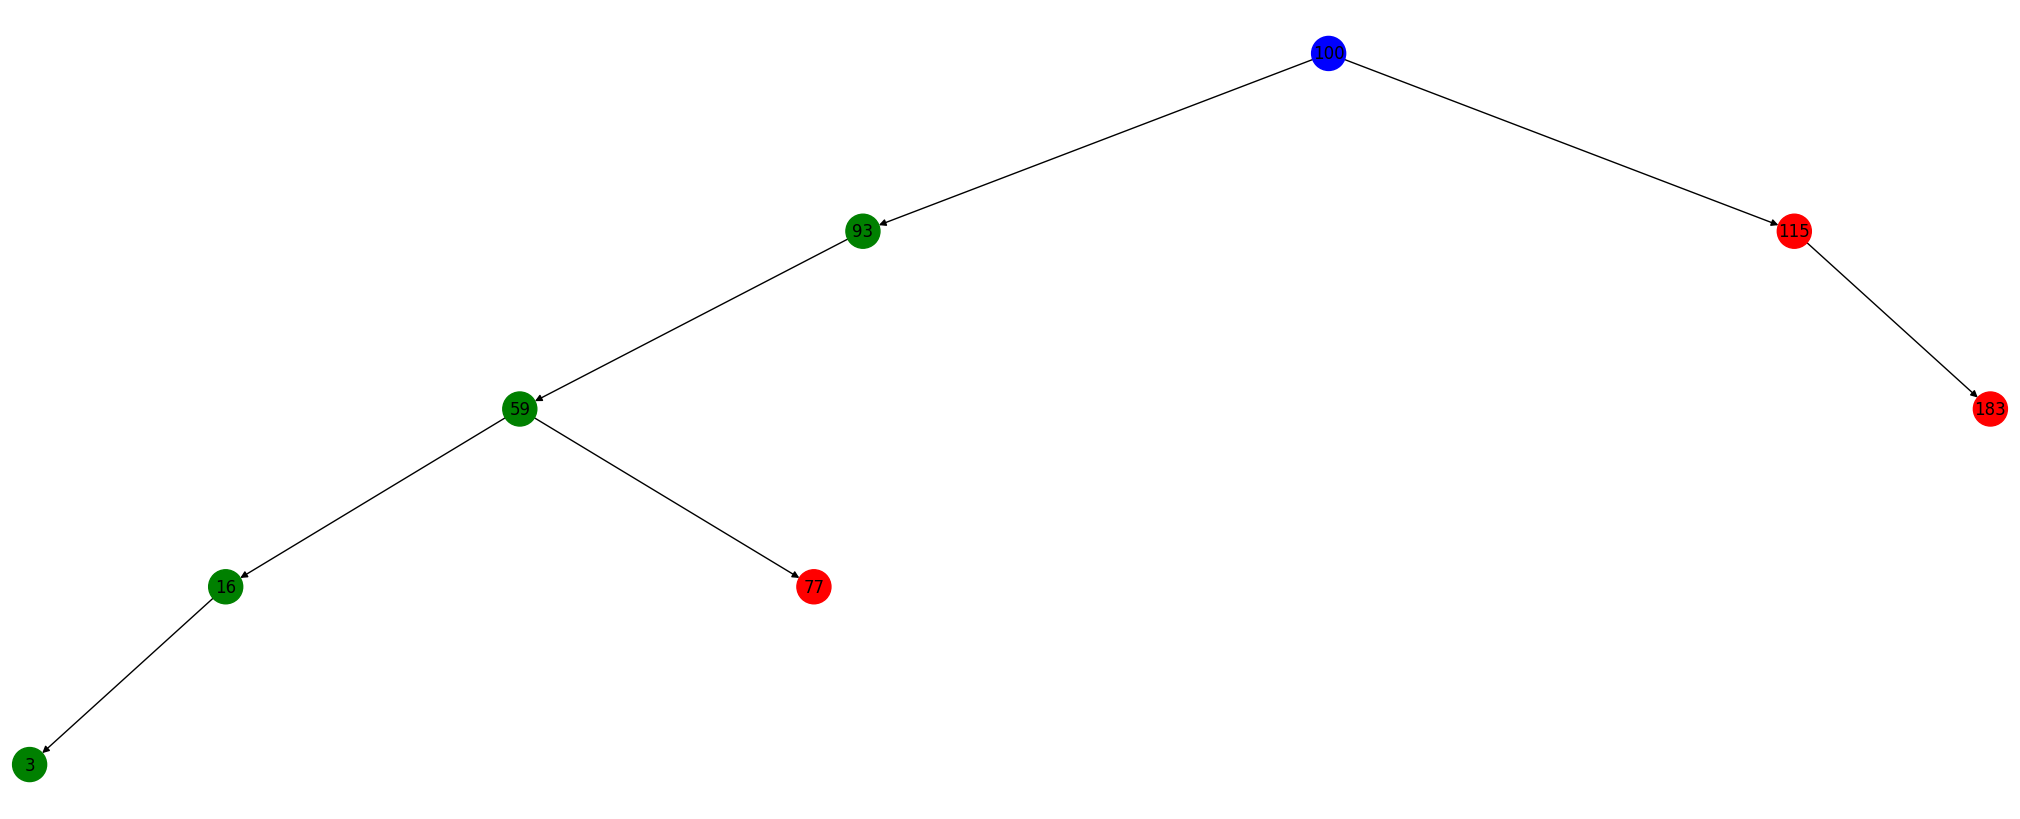

In [17]:
size = 50
tree = BinarySearchTree(Node(size*2))

for value in RNG.integers(0, size*4, size):
    tree.add(value)
    
tree.show(False)

## 2.1 Tree Statistic (Counting leafs, get height \& highest value)

We continue the work of building the Tree implementations. Here, we will add some methods that contain some simple statistics about a `BinaryTree` or `BinarySearchTree` object.
These statistics include: counting the number of leafs, getting the height of the tree, and getting the highest values (for both any binary tree and a binary search tree).

In [18]:
%%execwritefile exercise2_{student}_notebook.py 21 -a -c -s

class BinaryTree(BinaryTree):
    @staticmethod
    def get_highest_subtree_value(subtree):
        """
        Gets the highest value out of a subsection of a binary tree (not a binary search tree!!).
        This should be a recursive method.

        :param subtree: The node of the subtree.
        :type subtree: Node
        :return: The highest value within this subtree.
        :rtype: int
        """
        if subtree is None:
            return float('-inf')
        else:
            return max(subtree.info, BinaryTree.get_highest_subtree_value(subtree.left), BinaryTree.get_highest_subtree_value(subtree.right))
        
    def get_highest_value(self):
        """
        Gets the highest value out of a binary tree (not a binary search tree!!).
        This function should use the recursive static method `_get_highest_subtree_value`.

        :return: The highest value within this tree.
        :rtype: int
        """
        return BinaryTree.get_highest_subtree_value(self.root)
        
    @staticmethod
    def count_subtree_leafs(subtree):
        """
        Counts the number of leafs in a subsection of a binary tree.
        This should be a recursive method.
    
        :param subtree: The root of the subtree.
        :type subtree: Node
        :return: The number of leafs in the subtree.
        :rtype: int
        """
        if subtree is None:
            return 0
        elif subtree.left is None and subtree.right is None:
            return 1
        else:
            return BinaryTree.count_subtree_leafs(subtree.left) + BinaryTree.count_subtree_leafs(subtree.right)


    def count_leafs(self):
        """
        Counts the number of leafs in a binary tree.
        This method should use the recursive method `count_subtree_leafs`.
            
        :return: The number of leafs in the tree.
        :rtype: int
        """
        return BinaryTree.count_subtree_leafs(self.root)

    @staticmethod
    def get_subtree_height(subtree):
        """
        Determines the height of a subsection of a binary tree. 
        This should be a recursive method.
    
        :param subtree: The root of the subtree.
        :type subtree: Node
        :return: The height of the subtree.
        :rtype: int
        """
        if subtree is None:
            return 0
        else:
            return 1 + max(BinaryTree.get_subtree_height(subtree.left), BinaryTree.get_subtree_height(subtree.right))


    def get_height(self):
        """
        Determines the height of a binary tree.
        This method should use the recursive method `get_subtree_height`.

        :return: The height of the tree.
        :rtype: int
        """
        return BinaryTree.get_subtree_height(self.root)

Replace existing code exercise2_3893995_notebook.py


In [19]:
%%execwritefile exercise2_{student}_notebook.py 41 -a -c -s

class BinarySearchTree(BinarySearchTree, BinaryTree):   
    def get_highest_value(self, subtree=None):
        """
        Gets the highest value out of a binary search tree.
        Implement a faster algorithm compared to a general binary tree highest value algorithm given that this is a binary search tree.
        If no arguments are given this method should give the highest value of the whole tree.

        Note, that an empty tree has a negative infinite value as the highest value.
        
        :param subtree: The root of the subtree, defaults to None.
        :type subtree: Node
        :return: The highest value within this (sub)tree.
        :rtype: int
        """
        if subtree is None:
            subtree = self.root
        if subtree is None:
            return float('-inf')
        elif subtree.right is None:
            return subtree.info
        else:
            return self.get_highest_value(subtree.right)

Replace existing code exercise2_3893995_notebook.py


## Test your code

In the cell below you can test your code from the cells above (ensure you run the cells beforehand) to validate if `get_highest_value` (for both trees), `get_height`, and `get_highest_value` work as intended. To do this create a `BinaryTree` object, add nodes to the tree using `add`, and then use `show` to visualize the tree. Next print the statistic of the tree and verify that your implementation works correctly. Repeat the same process for a `BinarySearchTree` object.

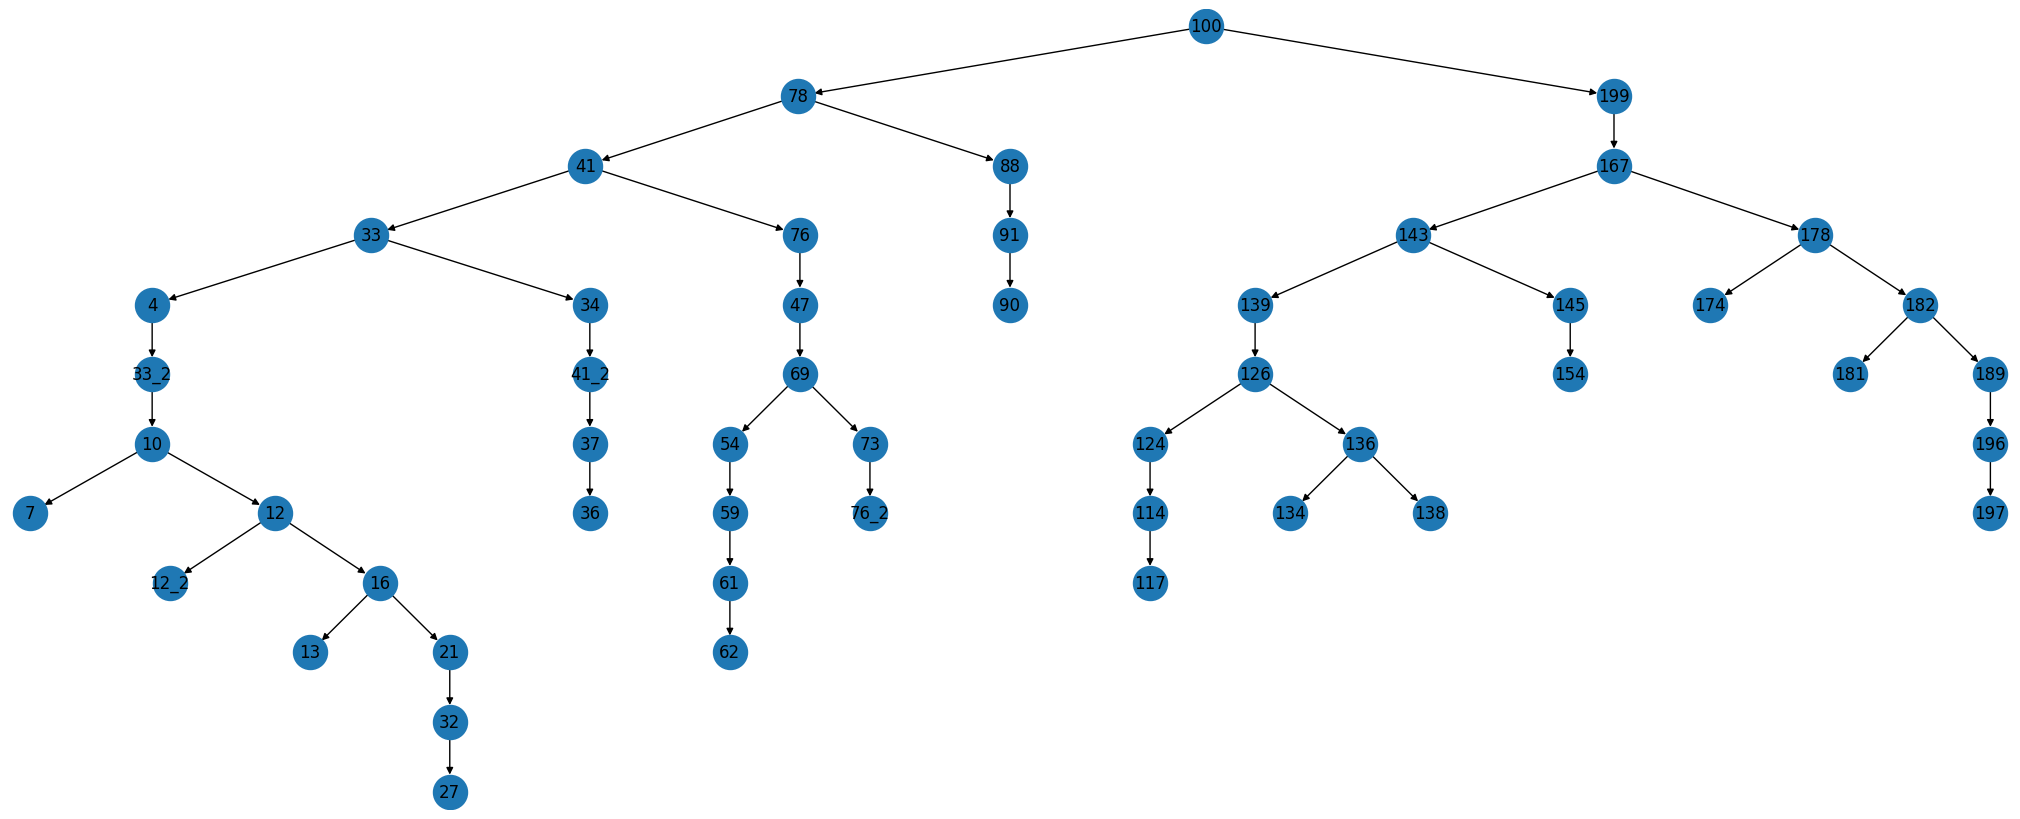

The highest value is: 199
The number of leaf nodes is: 15
The height of the tree is: 12


In [20]:
size = 50
tree = BinaryTree(Node(size*2))

for value in RNG.integers(0, size*4, size):
    tree.add(value)
    
tree.show(True)

print("The highest value is:", tree.get_highest_value())
print("The number of leaf nodes is:", tree.count_leafs())
print("The height of the tree is:", tree.get_height())

## 2.2 Check Binary Search Tree

We continue the work of building the Binary Search Tree implementation. Here, we will implement a method to check if a binary search tree is valid.
To check if a tree is a valid binary search tree it can be helpful to implement two helper functions: `get_highest_value` and `get_lowest_value`.
Previously, we already implemented the `get_highest_value` method so you only have to implement the `get_lowest_value` and `is_binary_search_tree` method below. 

In [23]:
%%execwritefile exercise2_{student}_notebook.py 42 -a -c -s

class BinarySearchTree(BinarySearchTree):   
    def get_lowest_value(self, subtree=None):
        """
        Gets the lowest value out of a binary search tree.
        Implement a faster algorithm compared to a general binary tree lowest value algorithm given that this is a binary search tree.
        If no arguments are given this method should give the lowest value of the whole tree.

        Note, that an empty tree has a positive infinite value as the highest value.

        :param subtree: The root of the subtree, defaults to None.
        :type subtree: Node
        :return: The lowest value within this (sub)tree.
        :rtype: int
        """
        if subtree is None:
            subtree = self.root
        if subtree is None:
            return float('inf')
        elif subtree.left is None:
            return subtree.info
        else:
            return self.get_lowest_value(subtree.left)

    def is_binary_search_tree(self, subtree=None):
        """
        Returns whether the tree is a valid binary search tree. 
        Hint: You can implement this as a recursive method. 
        You can under some assumptions make use of
        get_lowest_value and get_highest_value.
        If no arguments are given this method should check if the whole tree is a valid binary search tree.

        :param subtree: The root of the subtree, defaults to None.
        :type subtree: Node
        :return: true iff it is a valid binary search tree
        :rtype: Boolean
        """
        if subtree is None:
            subtree = self.root
        if subtree is None:
            return True
        
        if subtree.left is None:
            left_valid = True
        else:
            left_valid = subtree.info > self.get_lowest_value(subtree.left) and self.is_binary_search_tree(subtree.left)
            
        if subtree.right is None:
            right_valid = True
        else:
            right_valid = subtree.info < self.get_highest_value(subtree.right) and self.is_binary_search_tree(subtree.right)
        
        return left_valid and right_valid

Replace existing code exercise2_3893995_notebook.py


## Test your code

In the cell below you can test your code from the cells above (ensure you run the cells beforehand) to validate if `is_binary_search_tree` works as intended. To do this create a `BinarySearchTree` object, add nodes to the tree using `add`, and then use `show` to visualize the tree. Next print if the `BinarySearchTree` is indeed a binary search tree.

Additionally, you can also make a `BinarySearchTree` that is not a binary search tree and check if `is_binary_search_tree` gives False as answer.

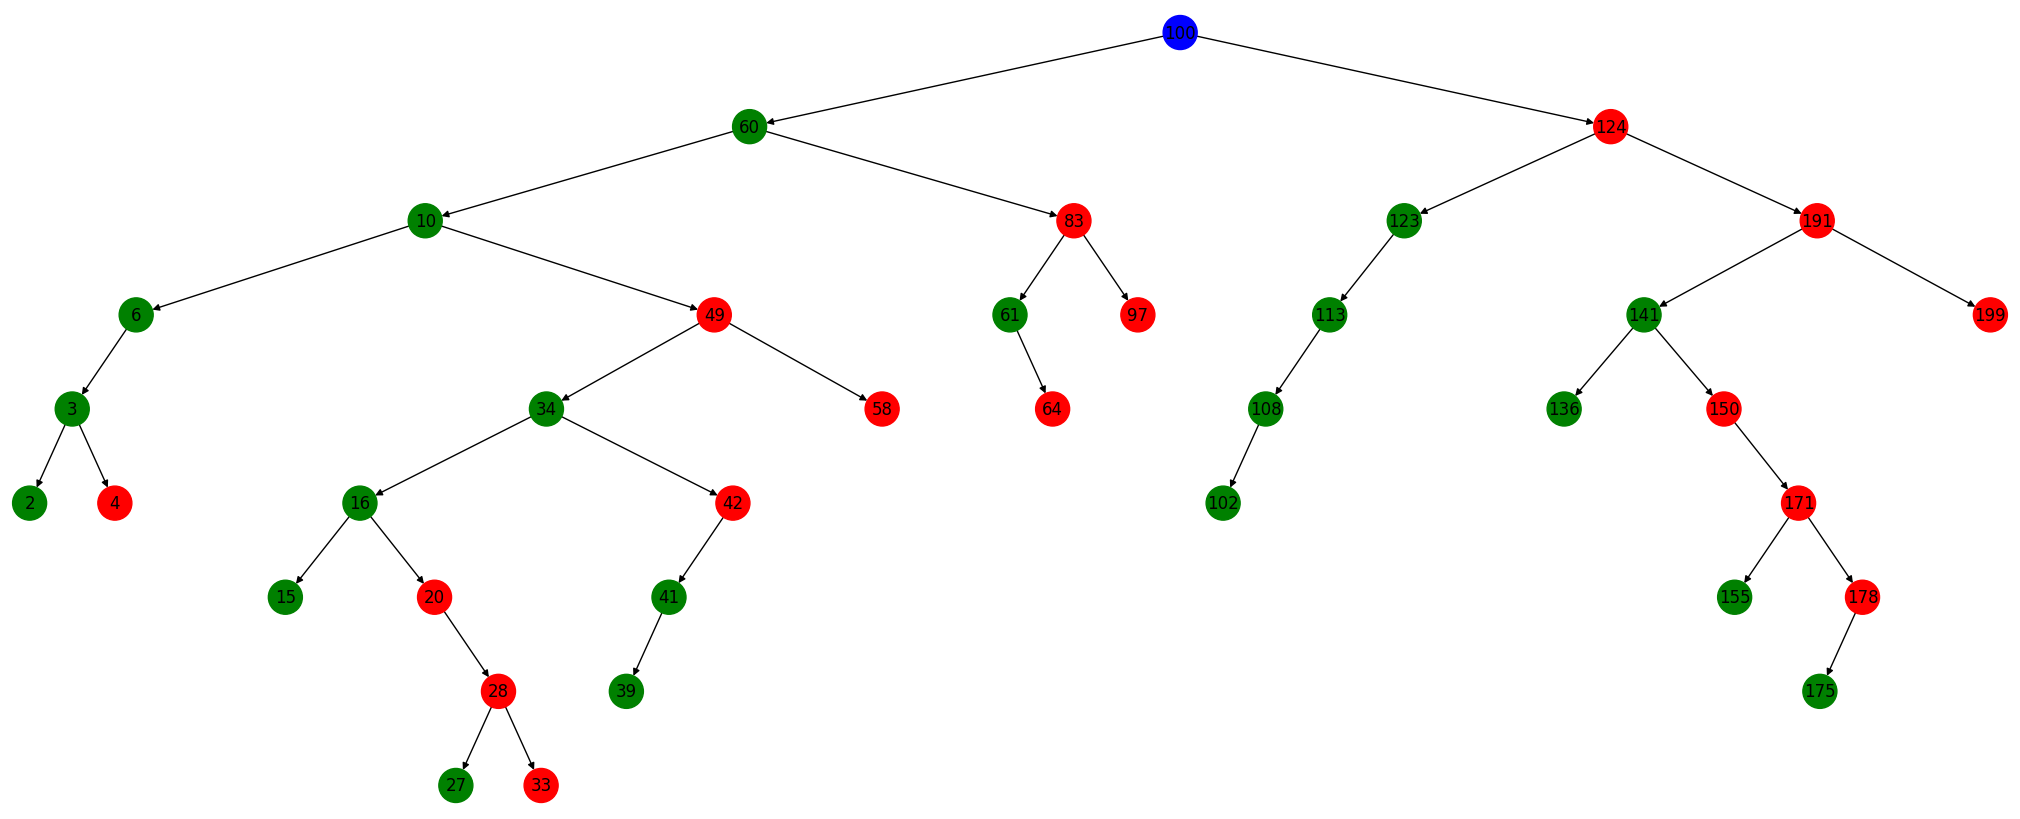

Is this tree a binary search tree? True


In [24]:
size = 50
tree = BinarySearchTree(Node(size*2))

for value in RNG.integers(0, size*4, size):
    tree.add(value)
    
tree.show()
print("Is this tree a binary search tree?", tree.is_binary_search_tree())

## 2.2 Remove a Node (Binary Search Tree)

We continue the work of building the Binary Search Tree implementation. Here, we will implement a method to remove a value from a binary search tree.
When removing a value or in other words a node the rules of a binary search tree can not be violated. This means that for each node, all values in the left sub-tree are smaller than its value,
and all values in the right subtree are greater than its value. If a value does not exist in the tree you do not need to do anything.

In [25]:
%%execwritefile exercise2_{student}_notebook.py 43 -a -c -s

class BinarySearchTree(BinarySearchTree):   
    def remove(self, value):
        """
        Removes a node from the binary search tree. 
    
        :param value: The value that needs to be deleted.
        :type value: int
        """

        parent, node = self.search(value)
        
        if node is None:
            return  # Node not found, nothing to remove
        
        if node.left is None and node.right is None:
            # Case 1: Node is a leaf node
            if parent is None:
                self.root = None  # Node is root and tree has only one node
            elif parent.left == node:
                parent.left = None
            else:
                parent.right = None
                
        elif node.left is None or node.right is None:
            # Case 2: Node has only one child
            if node.left is None:
                child = node.right
            else:
                child = node.left
                
            if parent is None:
                self.root = child  # Node is root
            elif parent.left == node:
                parent.left = child
            else:
                parent.right = child
                
        else:
            # Case 3: Node has two children
            successor_parent = node
            successor = node.right
            while successor.left is not None:
                successor_parent = successor
                successor = successor.left
                
            node.info = successor.info
            
            if successor_parent.left == successor:
                successor_parent.left = successor.right
            else:
                successor_parent.right = successor.right


Appending to exercise2_3893995_notebook.py


## Test your code

In the cell below you can test your code from the cells above (ensure you run the cells beforehand) to check if `remove` works as intended. To do this create a `BinarySearchTree` object, add nodes to the tree using `add`, and then use `show` to visualize the tree. Next, remove any node and show the tree again. Now, you can check if the node is correctly removed.

Additionally, you can use `is_binary_search_tree` to check if the tree is still a binary search tree. There are a lot more way to check your solution so feel free to do any test in the cell below.

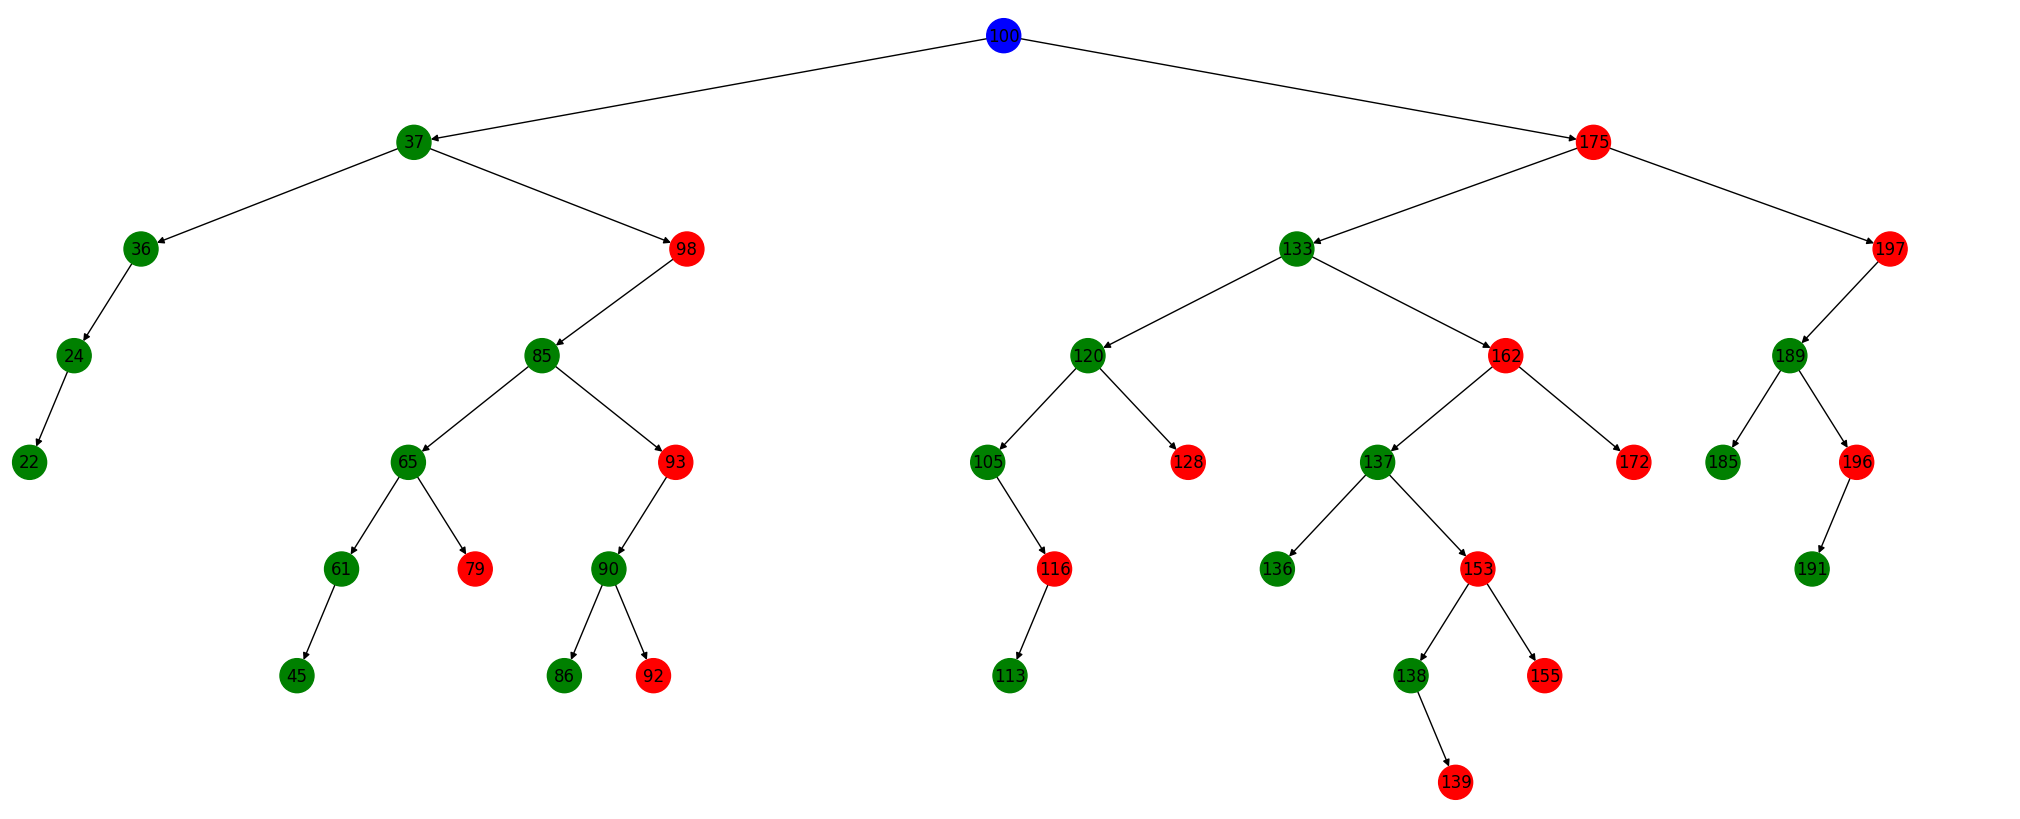

remove 93


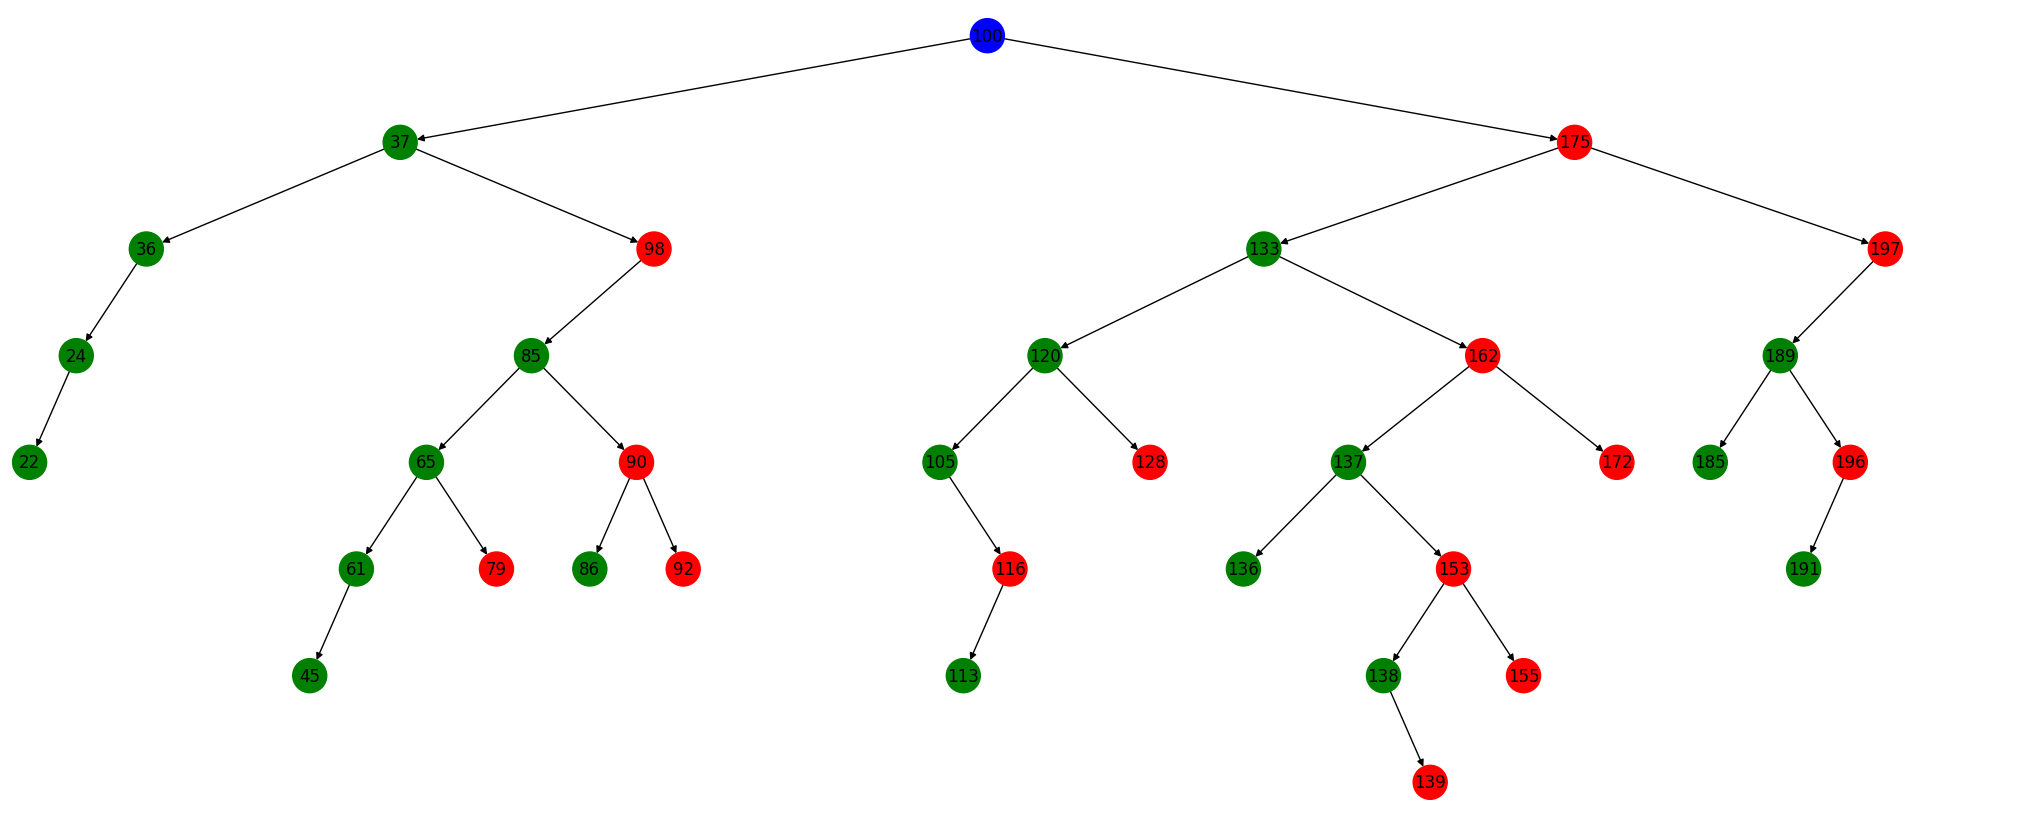

In [26]:
size = 50
tree = BinarySearchTree(Node(size*2))

values = set()
for value in RNG.integers(0, size*4, size):
    tree.add(value)
    values.add(value)
    
tree.show()
print("remove", value := RNG.choice(list(values)))
tree.remove(value)
tree.show()


# 3.0 Double-linked Tree

## ***All exercises below are additional content for extra practice, they only count for a small percentage of the bonus (TestExpert). So, you can skip to section [4.0 Unittests](#4.0-UNITTESTS) if you do not want to do these exercises.***

Linked lists are useful data structures, but a double-linked list is often more appropriate. The downside of the double-linked list is that it takes more memory on your computer (per object you need to save which node comes next and which came before). However, the major advantage is that you can go through them front-to-back but also back-to-front. Also, often when doing operations it makes the code easier and faster, such operations could be, inserting a value before another value in the list. With a double-linked list, you can search for the value and then go back a step to update the list. With a single linked list you either need to go through the list twice or constantly save the previous and current objects in the list.

This idea of going both ways in a double-linked list can also be applied to trees and is often the preferred implementation of a tree. A double-linked tree can be made by not only storing the children in a node but also the parents. Below, we will implement such a Node. Later, we will make some methods of the double-linked tree.

In [27]:
%%execwritefile exercise2_{student}_notebook.py 50 -a -s

class NodeD():
    """
    This class creates node objects which can be used to build any kind of Tree 
    that has at most two children and the nodes contain values.

    Attributes:
        :param self.info: The value of the node.
        :type self.info: int
        :param self.parent: The parent of this node, defaults to None.
        :type self.parent: Node, optional 
        :param self.left: The left child of this node, defaults to None.
        :type self.left: Node, optional 
        :param self.left: The right child of this node, defaults to None.
        :type self.left: Node, optional 
    """
    def __init__(self, info, parent=None, left=None, right=None):
        self.info = info
        self.parent = parent
        self.left = left
        self.right = right

    def __repr__(self):
        """
        This returns a representation of a Node object.

        :return: A string representing the Node object.
        :rtype: str
        """
        # Change this to anything you like, such that you can easily print a Node object.
        return super(NodeD, self).__repr__() 

Appending to exercise2_3893995_notebook.py


## Test your code

In the cell below you can test your code from the cell above (ensure you run the cell beforehand) to validate if __repr__ works as you intended. To do this create a Node object and print it.

In [28]:
# Write code here
NodeD(10)

# 3.1 Binary Search Tree 

The following code outlines the stub of a Binary Search Tree class. Study how this class works, and ensure you thoroughly study the docstrings to get a clear idea of how the class ought to be implemented. 

Your task is to complete the `search`, `add`, and `remove` class methods of the `BinarySearchTree`.

For your convenience, we have added a way to visualize the binary search tree of a `BinarySearchTree`-object via the `show()` method. 

In [31]:
%%execwritefile exercise2_{student}_notebook.py 60 -a -s

class BinarySearchTreeDouble(BinaryTree):
    """
    This class creates binary tree objects with double-linked nodes (NodeD).
    The tree itself is stored recursively. 
    This means that you can only access the root node directly, 
    while other nodes can be accessed through the root node. 

    Attributes:
        :param self.root: The root node of the binary tree, defaults to None.
        :type self.root: Node, optional
    """
    def __init__(self, root=None):
        """
        This initializes a binary tree object.
        Note, that this creates an empty tree
        """
        self.root = root
    
    def search(self, value):
        """
        Returns a NodeD with the value that was searched for.
        Note, that NodeD objects already have access to the parent.
        So, it does not need to be returned.
    
        If the tree does not contain the value, return None.
    
        :param value: The value that you are searching.
        :param type: int
        :return: The NodeD with attribute info equal to value
        :rtype: NodeD
        """
        current = self.root
        while current is not None:
            if value == current.info:
                return current
            elif value < current.info:
                current = current.left
            else:
                current = current.right
        return None

    def add(self, value):
        """    
        Adds a new node to the binary search tree, respecting the condition that
        for each node, all values in the left sub-tree are smaller than its value,
        and all values in the right subtree are greater than its value.
        Only add the node with the value, if it does not exist yet in the tree.
    
        :param value: The value to be added.
        :type value: int
        """
        if self.root is None:
            self.root = NodeD(value)
        else:
            self._add(self.root, value)

    def remove(self, value):
        """
        Removes a node from the binary search tree. 
    
        :param value: The value that needs to be deleted.
        :type value: int
        """
        node_to_remove = self.search(value)
        
        if node_to_remove is None:
            return  # Node not found, nothing to remove
        
        parent = node_to_remove.parent
        
        if node_to_remove.left is None and node_to_remove.right is None:
            # Case 1: Node is a leaf node
            if parent is None:
                self.root = None  # Node is root and tree has only one node
            elif parent.left == node_to_remove:
                parent.left = None
            else:
                parent.right = None
                
        elif node_to_remove.left is None or node_to_remove.right is None:
            # Case 2: Node has only one child
            if node_to_remove.left is None:
                child = node_to_remove.right
            else:
                child = node_to_remove.left
                
            if parent is None:
                self.root = child  # Node is root
            elif parent.left == node_to_remove:
                parent.left = child
            else:
                parent.right = child
                
        else:
            # Case 3: Node has two children
            successor_parent = node_to_remove
            successor = node_to_remove.right
            while successor.left is not None:
                successor_parent = successor
                successor = successor.left
                
            node_to_remove.info = successor.info
            
            if successor_parent.left == successor:
                successor_parent.left = successor.right
            else:
                successor_parent.right = successor.right

Replace existing code exercise2_3893995_notebook.py


## Test your code

In the cell below you can test your code from the cell above (ensure you run the cell beforehand) to validate if `add`, `remove`, and `search` work as intended.
To do this create a `BinarySearchTreeDouble` object, add nodes to the tree using `add`, and then use `show` to verify that your implementation works correctly. 
Additionally, you could add some print statements to check if the search method works correctly and use `remove` and `show` to see if `remove` works correctly.

In [32]:
# Write code here
NodeD(10)

# 4.0 List Representation of a Tree

Until now, we supplied you with a `show` method to check your work. However, normally classes do not come with preprogrammed `show` methods and it is often up to you to write a good representation method for the class for debugging and testing. Representation of a class is made with `__repr__`. 

*Note, that `__str__` is not the same as this is the method to convert an object of your class to a string, which can be something totally different than the `__repr__`.*

Implement the `__repr__` magic method down below for the `BinaryTree` class which makes it also work for the `BinaryTreeSearch` class through inheritance. The inheritance is done for you throughout this assignment.

For this exercise, the representation of a tree will be a recursively nested list. The rules are stated below the examples. For example, a tree with one node (info=10) looks like this: `[10]`. Below, you can find a few more elaborate examples.

Example 1: \
`root(info=10) -> [left(info=5), right(info=15)]` will have the representation\
`[10 -> [5, 15]]`

Example 2: \
`root(info=5) -> [left(None), right(info=10) -> [left(None), right(info=15)]]` will have the representation\
`[5 -> [10 -> [15]]`

Example 3: A tree that is made by adding the following values to an empty tree in the order: 5,3,1,10,7,6,8,12, will have the representation\
`[5 -> [3 -> [1], 10 -> [7 -> [6, 8], 12]]]`

The rules are:
 - The representation of the Node is used to represent a node. In the example, the representation of the node is assumed to be the `info` of the node.
 - To signal a parent-child relation a ` -> ` is used with on either side a white space.
 - After an arrow follows a list with the left and right child separated by a comma, see example 1. Thus the first item in the list is the left child and the second item is the right child.
 - If a child has its own children then this is again indicated with an arrow.
 - Note, that a comma has no white space on the left and one on the right.
 - An empty tree is represented by an empty list, thus `self.root = None` -> `[]`.

***Important note, the print statement in python converts everything to a string if it is not a string. Therefore, it uses the `__str__` magic method of objects. If you want to use `__repr__` you need to use `print(repr(obj))` unless `__str__` is not overwritten by you as the default of `__str__` is calling `__repr__`.***

In [33]:
%%execwritefile exercise2_{student}_notebook.py 22 -a -s -c

class BinaryTree(BinaryTree):
    def __repr__(self):
        """
        This returns the representation of a tree. See above, for how this should look like.
        """
        if self.root is None:
            return "Empty Tree"

Appending to exercise2_3893995_notebook.py


In [34]:
class BinarySearchTree(BinarySearchTree, BinaryTree):
    """
    Run this cell, otherwise, __repr__ does not work for the BinarySearchTree!!!
    """
    pass

class BinarySearchTreeDouble(BinarySearchTreeDouble, BinaryTree):
    """
    Run this cell, otherwise, __repr__ does not work for the BinarySearchTreeDouble!!!
    """
    pass

## Test your code

In the cell below you can test your code from the cell above (ensure you run the cell beforehand) to validate if `__repr__` works as you intended.
To do this create a `Node` object and print it.

In [35]:
# Write code here
print(BinaryTree())
print(BinarySearchTree())
print(BinarySearchTreeDouble())


Empty Tree
Empty Tree
Empty Tree


# 5.0 UNITTESTS

During this assignment, we copied all your code to the following **.py** file **"exercise2_{student}_notebook.py"**. You also tested your code along the way. However, it is possible that there are still a few errors. Therefore, it is good to run some unittest when you complete all coding. This gives you an extra chance to spot mistakes. Here, we added some unittest for you to use. Note, that they are merely a check to see if your **.py** is correct.

From this point onwards we strongly advise renaming the **"exercise2_{student}_notebook.py"** file to the correct file name that you need to hand in **"exercise2_{student}.py"**. Now, you can adjust the **"exercise2_{student}.py"** file without the risk of overwriting it when you run the notebook again. This also enables the possibility to run the unittests. Note, that from now on if you make a change in the Python file and you want to go back to the notebook later that you also make this change in the notebook. To run the unittests go to the **"unit_test.py"** file and run the file in either PyCharm, VSCode, or a terminal. You can run it in a terminal using the following command: `python -m unittest --verbose unit_test.py`. `--verbose` is optional but gives you more details about which tests fail and which succeed.

You are allowed to add your own unittests. 

## Uploading to Brightspace for Bonus

Next, you can upload your Python file with the correct name on brightspace in the bonus assignment. Follow the instructions on this brightspace page carefully to have a successful submission. After you get the feedback for this exercise you can either continue working in the Python file to fix possible bugs or you can go back to the notebook and remake the Python file. ***Please be careful, do not update your code in both the Python file and notebook at the same time!***. If you go back to the notebook do not forget to update the notebook with any changes you made within the Python file. In this case, it is best to just delete the Python file as soon as you copied all changes.

***NOTE, that you can now also upload the exercises from week 1! The process is exactly the same only there is no unittest.***